<a href="https://colab.research.google.com/github/HarryPotter12/PractiseML/blob/master/DM_Ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import io
import numpy as np
from numpy import diag
from numpy import zeros
from numpy import linalg as LA
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from scipy.stats import kendalltau

In [0]:
R_orig = pd.read_csv('/content/gdrive/My Drive/Datasets/user-shows.txt',sep=' ',header=None)
shows = pd.read_csv('/content/gdrive/My Drive/Datasets/shows.txt',header=None)

shows

In [0]:
R_orig_np = R_orig.to_numpy()

In [0]:
R_orig_np.shape

(9985, 563)

In [0]:
m, n = R_orig_np.shape

In [0]:
R_removed = R_orig.copy()

In [0]:
R_removed.iloc[19, 0:99] = 0
R_removed_np = R_removed.to_numpy()

for i in range(21):
  print("i=", i, "\t", A_orig.iloc[19, i], "\t", A_removed.iloc[19, i], end="\n")

In [0]:
P = np.zeros(shape=(m, m), dtype='int')
Q = np.zeros(shape=(n, n), dtype='int')

In [0]:
R_p = np.sum(R_removed_np, axis=1)   #user
R_q = np.sum(R_removed_np, axis=0)   #item

In [0]:
for u in range(m):
    P[u][u] = R_p[u]
for i in range(n):
    Q[i][i] = R_q[i]

In [0]:
R_T = np.transpose(R_removed_np)

In [0]:
RtR = np.matmul(R_T, R_removed_np)
RRt = np.matmul(R_removed_np, R_T)

In [0]:
P_sqrt = LA.inv(np.sqrt(P))
Q_sqrt = LA.inv(np.sqrt(Q))

In [0]:
Si = np.matmul(np.matmul(Q_sqrt, RtR), Q_sqrt)
Su = np.matmul(np.matmul(P_sqrt, RRt), P_sqrt)

In [0]:
Gu = np.matmul(Su, R_removed_np)
Gi = np.matmul(R_removed_np, Si)

In [0]:
rec_user = (-Gu[19][0:100]).argsort()[:5]
rec_item = (-Gi[19][0:100]).argsort()[:5]

In [0]:
print(rec_user)
print(rec_item)

[96 74 45 35 60]
[35 63 96 74 48]


In [0]:
print("For Item-Item Collaborative Filtering: ")
for i in range(5):
  print("Show {:d} : ".format(i+1), shows[0][rec_item[i]], "\tSimilarity score = {:.6f}".format(Gi[19][rec_item[i]]))
print("\nFor User-User Collaborative Filtering: ")
for i in range(5):
  print("Show {:d} : ".format(i+1), shows[0][rec_user[i]], "\tSimilarity score = {:.6f}".format(Gu[19][rec_user[i]]))

For Item-Item Collaborative Filtering: 
Show 1 :  SpongeBob SquarePants 	Similarity score = 15.385709
Show 2 :  Wow Wow Wubbzy 	Similarity score = 15.247345
Show 3 :  FOX 28 News at 10pm 	Similarity score = 14.954295
Show 4 :  Family Guy 	Similarity score = 14.927589
Show 5 :  Max and Ruby 	Similarity score = 14.924622

For User-User Collaborative Filtering: 
Show 1 :  FOX 28 News at 10pm 	Similarity score = 666.482824
Show 2 :  Family Guy 	Similarity score = 664.956977
Show 3 :  2009 NCAA Basketball Tournament 	Similarity score = 588.914140
Show 4 :  SpongeBob SquarePants 	Similarity score = 583.334679
Show 5 :  NBC 4 at Eleven 	Similarity score = 565.554363


In [0]:
total = np.sum(R_orig_np[19][0:100])
print(total)

19


In [0]:
k_array = np.arange(1, 20)
true_pos_array_user = np.empty(19)
true_pos_array_item = np.empty(19)
reality = (-R_orig_np[19][0:100]).argsort()[:19]
for k in range(1, 20):
  top_k_user = (-Gu[19][0:100]).argsort()[:k]
  top_k_item = (-Gi[19][0:100]).argsort()[:k]
  watch_count_in_top_k_user = 0
  watch_count_in_top_k_item = 0
  for i in range(k):
    watch_count_in_top_k_user += np.sum(reality == top_k_user[i])
    watch_count_in_top_k_item += np.sum(reality == top_k_item[i])
  true_pos_array_user[k-1] = watch_count_in_top_k_user / total
  true_pos_array_item[k-1] = watch_count_in_top_k_item / total

print(true_pos_array_user)
print(true_pos_array_item)

k_array

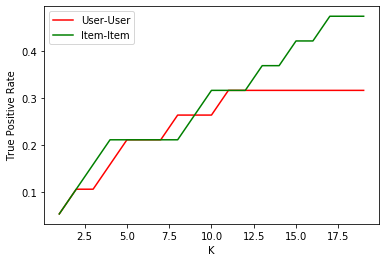

In [0]:
plt.plot(k_array, true_pos_array_user, "r", label="User-User")
plt.plot(k_array, true_pos_array_item, "g", label="Item-Item")
plt.xlabel("K")
plt.ylabel("True Positive Rate")
plt.legend()

reality = (-R_orig_np[19][0:100]).argsort()[:19]
print(reality)

R_orig_np[19][0:100]

In [0]:
P = np.zeros(shape=(m, m), dtype='int')
Q = np.zeros(shape=(n, n), dtype='int')

In [0]:
R_p = np.sum(R_orig_np, axis=1)   #user
R_q = np.sum(R_orig_np, axis=0)   #item

In [0]:
for u in range(m):
    P[u][u] = R_p[u]
for i in range(n):
    Q[i][i] = R_q[i]

In [0]:
R_T = np.transpose(R_orig_np)

In [0]:
RtR = np.matmul(R_T, R_orig_np)
RRt = np.matmul(R_orig_np, R_T)

In [0]:
P_sqrt = LA.inv(np.sqrt(P))
Q_sqrt = LA.inv(np.sqrt(Q))

In [0]:
Si = np.matmul(np.matmul(Q_sqrt, RtR), Q_sqrt)
Su = np.matmul(np.matmul(P_sqrt, RRt), P_sqrt)

In [0]:
Gu = np.matmul(Su, R_orig_np)
Gi = np.matmul(R_orig_np, Si)

In [0]:
rec_user = (-Gu[19][0:100]).argsort()[:10]
rec_item = (-Gi[19][0:100]).argsort()[:10]

In [0]:
print(rec_user)
print(rec_item)

[96 74 45 60 68 35  9  5 62 82]
[96 35 74 63 60 68 45 48  5 82]


In [0]:
print("For Item-Item Collaborative Filtering: ")
for i in range(10):
  print("Show {:d} : ".format(i+1), shows[0][rec_item[i]], "\tSimilarity score = {:.6f}".format(Gi[19][rec_item[i]]))
print("\nFor User-User Collaborative Filtering: ")
for i in range(10):
  print("Show {:d} : ".format(i+1), shows[0][rec_user[i]], "\tSimilarity score = {:.6f}".format(Gu[19][rec_user[i]]))

For Item-Item Collaborative Filtering: 
Show 1 :  FOX 28 News at 10pm 	Similarity score = 23.727598
Show 2 :  SpongeBob SquarePants 	Similarity score = 23.570996
Show 3 :  Family Guy 	Similarity score = 23.465342
Show 4 :  Wow Wow Wubbzy 	Similarity score = 22.525837
Show 5 :  NBC 4 at Eleven 	Similarity score = 22.127889
Show 6 :  Today 	Similarity score = 21.975593
Show 7 :  2009 NCAA Basketball Tournament 	Similarity score = 21.968379
Show 8 :  Max and Ruby 	Similarity score = 21.745250
Show 9 :  Everybody Loves Raymond 	Similarity score = 21.625829
Show 10 :  Access Hollywood 	Similarity score = 21.562856

For User-User Collaborative Filtering: 
Show 1 :  FOX 28 News at 10pm 	Similarity score = 1034.327955
Show 2 :  Family Guy 	Similarity score = 1018.314543
Show 3 :  2009 NCAA Basketball Tournament 	Similarity score = 906.109312
Show 4 :  NBC 4 at Eleven 	Similarity score = 893.089204
Show 5 :  Today 	Similarity score = 852.002909
Show 6 :  SpongeBob SquarePants 	Similarity score 

!pwd
!cd ./gdrive/My\ Drive/Datasets/
!pwd

f = open("op.txt", "w")
for i in range(m):
  for j in range(n):
    if R_orig_np[i][j] == 1:
      f.write("{:d}\t{:d}\n".format(i, j))
f.close()

In [0]:
itemknn = np.array([234, 48, 37, 543, 490, 477, 280, 553, 489, 222])
wrmf = np.array([48, 77, 192, 208, 195, 280, 207, 222, 219, 489])

In [0]:
print(rec_user)
print(rec_item)
print(itemknn)
print(wrmf)

[96 74 45 60 68 35  9  5 62 82]
[96 35 74 63 60 68 45 48  5 82]
[234  48  37 543 490 477 280 553 489 222]
[ 48  77 192 208 195 280 207 222 219 489]


In [0]:
print("User-user")
for i in range(10):
  print("{:d}".format(rec_user[i]), "\t", shows[0][rec_user[i]])
print("\nItem-item")
for i in range(10):
  print("{:d}".format(rec_item[i]), "\t", shows[0][rec_item[i]])
print("\nItemKNN")
for i in range(10):
  print("{:d}".format(itemknn[i]), "\t", shows[0][itemknn[i]])
print("\nWRMF")
for i in range(10):
  print("{:d}".format(wrmf[i]), "\t", shows[0][wrmf[i]])

User-user
96 	 FOX 28 News at 10pm
74 	 Family Guy
45 	 2009 NCAA Basketball Tournament
60 	 NBC 4 at Eleven
68 	 Today
35 	 SpongeBob SquarePants
9 	 Two and a Half Men
5 	 Everybody Loves Raymond
62 	 NBC 4 Today 
82 	 Access Hollywood

Item-item
96 	 FOX 28 News at 10pm
35 	 SpongeBob SquarePants
74 	 Family Guy
63 	 Wow Wow Wubbzy
60 	 NBC 4 at Eleven
68 	 Today
45 	 2009 NCAA Basketball Tournament
48 	 Max and Ruby
5 	 Everybody Loves Raymond
82 	 Access Hollywood

ItemKNN
234 	 Jack's Big Music Show
48 	 Max and Ruby
37 	 Curious George
543 	 Sesame Street
490 	 Clifford the Big Red Dog
477 	 The NewsHour with Jim Lehrer
280 	 Olivia
553 	 Dragon Tales
489 	 Caillou
222 	 Little Einsteins

WRMF
48 	 Max and Ruby
77 	 Disney's Mickey Mouse Clubhouse
192 	 Handy Manny
208 	 Tasty Time with ZeFronk
195 	 Imagination Movers
280 	 Olivia
207 	 Happy Monster Band
222 	 Little Einsteins
219 	 My Friends Tigger and Pooh
489 	 Caillou


In [0]:
coef1, p = kendalltau(rec_user, rec_item)
coef2, p = kendalltau(rec_user, itemknn)
coef3, p = kendalltau(rec_user, wrmf)
coef4, p = kendalltau(rec_item, itemknn)
coef5, p = kendalltau(rec_item, wrmf)
coef6, p = kendalltau(itemknn, wrmf)

In [0]:
print(coef1)
print(coef2)
print(coef3)
print(coef4)
print(coef5)
print(coef6)

0.24444444444444444
-0.24444444444444444
-0.28888888888888886
-0.19999999999999998
0.022222222222222223
0.24444444444444444
